# 🚀 Gradient Descent Deep Dive

- Trực quan hóa bề mặt cost function
- So sánh Batch / SGD / Mini-batch
- Ảnh hưởng của learning rate, batch size


In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
import sys
import os

# Thêm đường dẫn đến thư mục src
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))

from gradient_descent import GradientDescent, StochasticGradientDescent, MiniBatchGradientDescent
from data_generator import DataGenerator
from linear_regression import SimpleLinearRegression

# Set style
plt.style.use('seaborn-v0_8')

print("🚀 Gradient Descent Deep Dive")
print("=" * 50)


🚀 Gradient Descent Deep Dive


In [3]:
# Generate data for experiments
np.random.seed(42)
data_gen = DataGenerator(random_state=42)

# Create dataset with known parameters
X, y = data_gen.linear(num_samples=1000, weight=2.0, bias=3.0, noise_std=0.5)

print(f"Dataset: {X.shape[0]} samples, {X.shape[1]} features")
print(f"True parameters: weight=2.0, bias=3.0")

# Add bias term to X for gradient descent
X_with_bias = np.column_stack([np.ones(X.shape[0]), X])

print(f"X_with_bias shape: {X_with_bias.shape}")
print(f"First 5 samples:\n{X_with_bias[:5]}")


Dataset: 1000 samples, 1 features
True parameters: weight=2.0, bias=3.0
X_with_bias shape: (1000, 2)
First 5 samples:
[[ 1.         -2.50919762]
 [ 1.          9.01428613]
 [ 1.          4.63987884]
 [ 1.          1.97316968]
 [ 1.         -6.87962719]]


## 1. Cost Function Surface Visualization

Trực quan hóa bề mặt cost function để hiểu tại sao gradient descent hoạt động.


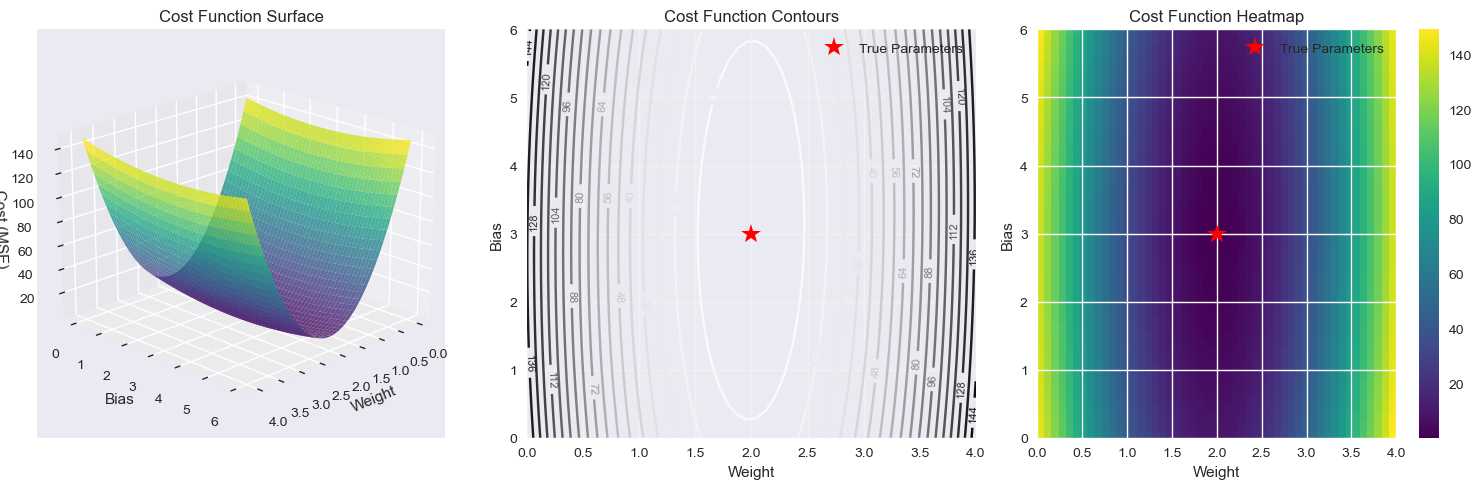

🎯 Observations:
- Cost function có dạng paraboloid (bowl-shaped)
- Minimum ở gần (weight=2.0, bias=3.0)
- Gradient descent sẽ 'roll down' từ bất kỳ điểm nào


In [4]:
# Create cost function surface
def compute_cost_surface(X, y, weight_range, bias_range):
    """Compute cost function over a grid of parameters"""
    W, B = np.meshgrid(weight_range, bias_range)
    costs = np.zeros_like(W)
    
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            # Compute predictions with current parameters
            y_pred = W[i,j] * X.squeeze() + B[i,j]
            # Compute MSE
            costs[i,j] = np.mean((y - y_pred) ** 2)
    
    return W, B, costs

# Define parameter ranges
weight_range = np.linspace(0, 4, 50)
bias_range = np.linspace(0, 6, 50)

# Compute cost surface
W, B, costs = compute_cost_surface(X, y, weight_range, bias_range)

# Create 3D visualization
fig = plt.figure(figsize=(15, 5))

# 3D surface plot
ax1 = fig.add_subplot(131, projection='3d')
surface = ax1.plot_surface(W, B, costs, cmap='viridis', alpha=0.8)
ax1.set_xlabel('Weight')
ax1.set_ylabel('Bias')
ax1.set_zlabel('Cost (MSE)')
ax1.set_title('Cost Function Surface')
ax1.view_init(elev=20, azim=45)

# Contour plot
ax2 = fig.add_subplot(132)
contour = ax2.contour(W, B, costs, levels=20)
ax2.clabel(contour, inline=True, fontsize=8)
ax2.set_xlabel('Weight')
ax2.set_ylabel('Bias')
ax2.set_title('Cost Function Contours')
ax2.grid(True, alpha=0.3)

# Mark true parameters
ax2.plot(2.0, 3.0, 'r*', markersize=15, label='True Parameters')
ax2.legend()

# Heatmap
ax3 = fig.add_subplot(133)
im = ax3.imshow(costs, extent=[weight_range.min(), weight_range.max(), 
                               bias_range.min(), bias_range.max()], 
                origin='lower', cmap='viridis', aspect='auto')
ax3.set_xlabel('Weight')
ax3.set_ylabel('Bias')
ax3.set_title('Cost Function Heatmap')
ax3.plot(2.0, 3.0, 'r*', markersize=15, label='True Parameters')
ax3.legend()
plt.colorbar(im, ax=ax3)

plt.tight_layout()
plt.show()

print("🎯 Observations:")
print("- Cost function có dạng paraboloid (bowl-shaped)")
print("- Minimum ở gần (weight=2.0, bias=3.0)")
print("- Gradient descent sẽ 'roll down' từ bất kỳ điểm nào")


## 2. So sánh Gradient Descent Variants

Batch vs Stochastic vs Mini-batch Gradient Descent


Training different gradient descent variants...

📊 Results Comparison
Method       Bias       Weight     Final Cost   Time (s)  
------------------------------------------------------------
Batch        3.0417     1.9961     0.243790     0.0118    
SGD          3.0747     1.9509     0.309134     0.4405    
Mini-batch   3.0481     1.9791     0.255690     0.0210    

True values: Bias=3.0, Weight=2.0


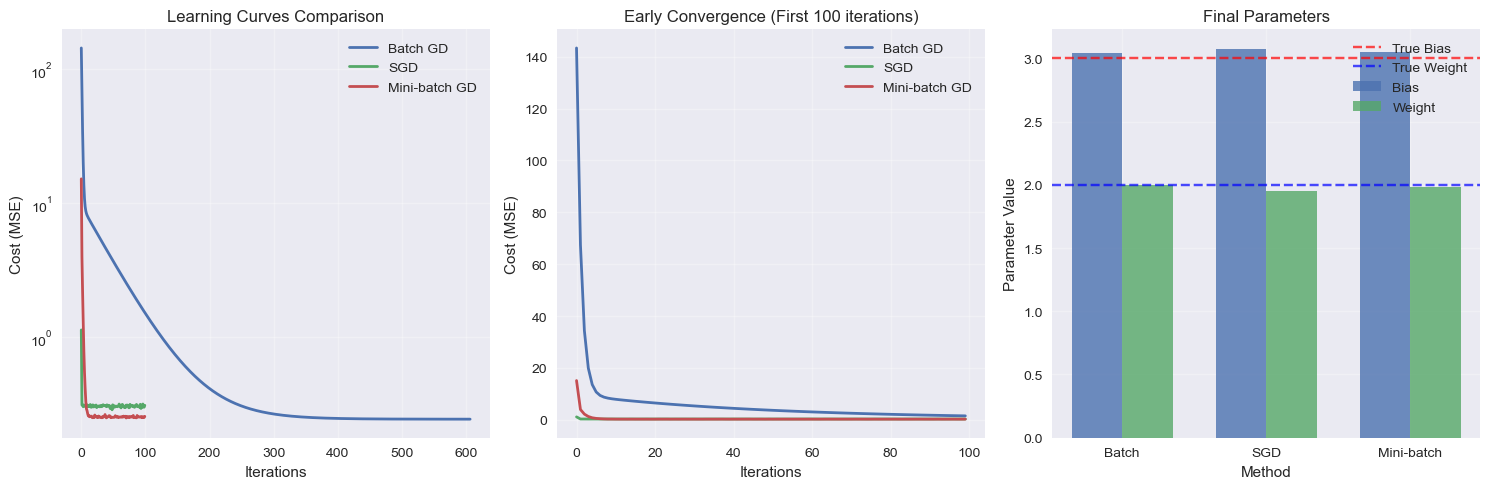

In [5]:
# Compare different gradient descent variants
print("Training different gradient descent variants...")

# Initialize optimizers
batch_gd = GradientDescent(learning_rate=0.01, max_iterations=1000, random_state=42)
stochastic_gd = StochasticGradientDescent(learning_rate=0.01, max_epochs=100, random_state=42)
minibatch_gd = MiniBatchGradientDescent(learning_rate=0.01, max_epochs=100, batch_size=32, random_state=42)

# Train models and measure time
results = {}

# Batch Gradient Descent
start_time = time.time()
theta_batch, cost_history_batch = batch_gd.optimize(X_with_bias, y)
batch_time = time.time() - start_time
results['Batch'] = {'theta': theta_batch, 'cost_history': cost_history_batch, 'time': batch_time}

# Stochastic Gradient Descent
start_time = time.time()
theta_sgd, cost_history_sgd = stochastic_gd.optimize(X_with_bias, y)
sgd_time = time.time() - start_time
results['SGD'] = {'theta': theta_sgd, 'cost_history': cost_history_sgd, 'time': sgd_time}

# Mini-batch Gradient Descent
start_time = time.time()
theta_minibatch, cost_history_minibatch = minibatch_gd.optimize(X_with_bias, y)
minibatch_time = time.time() - start_time
results['Mini-batch'] = {'theta': theta_minibatch, 'cost_history': cost_history_minibatch, 'time': minibatch_time}

# Print results
print("\n📊 Results Comparison")
print("=" * 60)
print(f"{'Method':<12} {'Bias':<10} {'Weight':<10} {'Final Cost':<12} {'Time (s)':<10}")
print("-" * 60)

for method, result in results.items():
    bias, weight = result['theta']
    final_cost = result['cost_history'][-1]
    time_taken = result['time']
    print(f"{method:<12} {bias:<10.4f} {weight:<10.4f} {final_cost:<12.6f} {time_taken:<10.4f}")

print(f"\nTrue values: Bias=3.0, Weight=2.0")

# Visualize learning curves
plt.figure(figsize=(15, 5))

# Plot 1: Learning curves
plt.subplot(1, 3, 1)
plt.plot(results['Batch']['cost_history'], label='Batch GD', linewidth=2)
plt.plot(results['SGD']['cost_history'], label='SGD', linewidth=2)
plt.plot(results['Mini-batch']['cost_history'], label='Mini-batch GD', linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Learning Curves Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Plot 2: Convergence speed (first 100 iterations)
plt.subplot(1, 3, 2)
plt.plot(results['Batch']['cost_history'][:100], label='Batch GD', linewidth=2)
plt.plot(results['SGD']['cost_history'][:100], label='SGD', linewidth=2)
plt.plot(results['Mini-batch']['cost_history'][:100], label='Mini-batch GD', linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Early Convergence (First 100 iterations)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Parameter convergence
plt.subplot(1, 3, 3)
methods = ['Batch', 'SGD', 'Mini-batch']
biases = [results[method]['theta'][0] for method in methods]
weights = [results[method]['theta'][1] for method in methods]

x = np.arange(len(methods))
width = 0.35

plt.bar(x - width/2, biases, width, label='Bias', alpha=0.8)
plt.bar(x + width/2, weights, width, label='Weight', alpha=0.8)
plt.axhline(y=3.0, color='red', linestyle='--', alpha=0.7, label='True Bias')
plt.axhline(y=2.0, color='blue', linestyle='--', alpha=0.7, label='True Weight')
plt.xlabel('Method')
plt.ylabel('Parameter Value')
plt.title('Final Parameters')
plt.xticks(x, methods)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 5 Bài học quan trọng từ việc so sánh các phương pháp Gradient Descent

### 1. **Batch Gradient Descent - Ổn định nhưng chậm**
- **Ưu điểm**: Hội tụ mượt mà, ổn định, luôn di chuyển theo hướng giảm cost function
- **Nhược điểm**: Chậm với dataset lớn vì phải tính toán trên toàn bộ dữ liệu mỗi iteration
- **Khi nào sử dụng**: Dataset nhỏ, cần độ chính xác cao, có đủ bộ nhớ

### 2. **Stochastic Gradient Descent (SGD) - Nhanh nhưng nhiễu**
- **Ưu điểm**: Cập nhật nhanh, có thể thoát khỏi local minima nhờ tính ngẫu nhiên
- **Nhược điểm**: Dao động nhiều, có thể không hội tụ chính xác đến điểm tối ưu
- **Khi nào sử dụng**: Dataset lớn, cần training nhanh, có thể chấp nhận một chút nhiễu

### 3. **Mini-batch Gradient Descent - Cân bằng tối ưu**
- **Ưu điểm**: Kết hợp ưu điểm của cả hai phương pháp trên, tận dụng được vectorization
- **Nhược điểm**: Cần điều chỉnh batch size phù hợp
- **Khi nào sử dụng**: Hầu hết các trường hợp thực tế, đặc biệt với deep learning

### 4. **Tầm quan trọng của Learning Rate**
- Learning rate quá lớn: Có thể bỏ lỡ điểm tối ưu, dao động mạnh
- Learning rate quá nhỏ: Hội tụ chậm, có thể bị kẹt ở local minima
- **Bài học**: Cần thử nghiệm và điều chỉnh learning rate phù hợp với từng phương pháp

### 5. **Không có phương pháp nào hoàn hảo cho mọi trường hợp**
- Lựa chọn phương pháp phụ thuộc vào: kích thước dataset, tài nguyên tính toán, yêu cầu về độ chính xác
- **Thực tế**: Mini-batch GD thường là lựa chọn tốt nhất cho hầu hết các ứng dụng
- **Chiến lược**: Bắt đầu với mini-batch, sau đó fine-tune dựa trên kết quả cụ thể
